In [1]:
!pip install yfinance matplotlib pandas numpy

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     --------------------- ---------------- 524.3/948.2 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=faa68ce327a47584148bf354f163402e8cf52df0042eb35157dc9342a2170160
  Stored in directory: c:\users\arti2\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


[*********************100%***********************]  1 of 1 completed


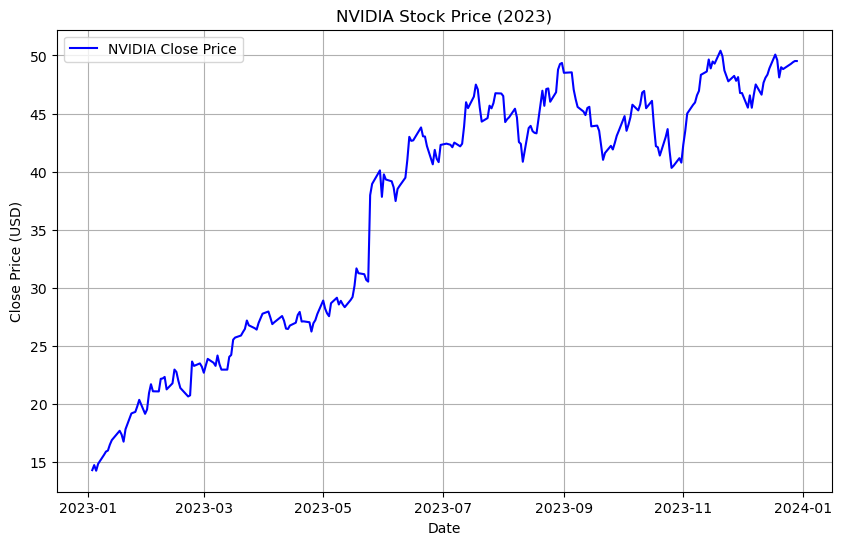

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Загрузка данных о цене акций NVIDIA за последний год
nvda = yf.download('NVDA', start='2023-01-01', end='2023-12-31')

# Отображение временного ряда на графике
plt.figure(figsize=(10, 6))
plt.plot(nvda['Close'], label='NVIDIA Close Price', color='blue')
plt.title('NVIDIA Stock Price (2023)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()


NVIDIA Close Price:

В начале года (январь 2023) цена акций NVIDIA стартовала на уровне около 15 USD.
В течение года наблюдается восходящий тренд с существенным ростом, особенно в середине года (май-июнь).
К концу года (декабрь 2023) цена акций достигла около 50 USD.
Основные этапы:

Январь — апрель: Постепенный рост с умеренными колебаниями до 30 USD.
Май — июнь: Резкий скачок цен — значительное ускорение роста (цены поднялись с 30 до 40 USD).
Июль — сентябрь: Колебания в диапазоне 40–50 USD, с периодическими падениями.
Октябрь — декабрь: Цены стабильно удерживаются на уровне 45–50 USD, показывая небольшой рост.
Волатильность:

График демонстрирует несколько участков с повышенной волатильностью (например, август и сентябрь), где цены активно колеблются вверх и вниз.
Однако общий тренд остается восходящим.

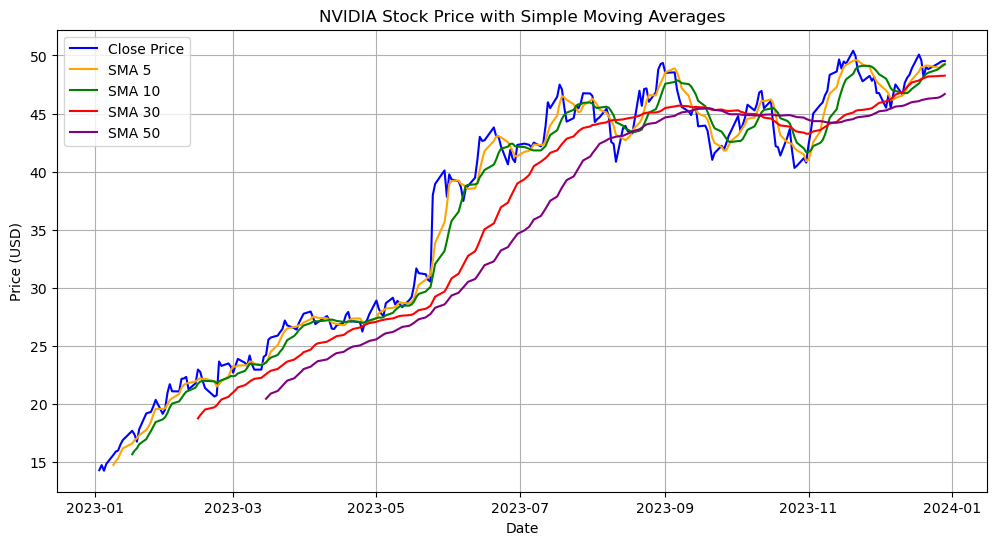

In [5]:
# Рассчитываем скользящие средние
nvda['SMA_5'] = nvda['Close'].rolling(window=5).mean()
nvda['SMA_10'] = nvda['Close'].rolling(window=10).mean()
nvda['SMA_30'] = nvda['Close'].rolling(window=30).mean()
nvda['SMA_50'] = nvda['Close'].rolling(window=50).mean()

# Построение графика с скользящими средними
plt.figure(figsize=(12, 6))
plt.plot(nvda['Close'], label='Close Price', color='blue')
plt.plot(nvda['SMA_5'], label='SMA 5', color='orange')
plt.plot(nvda['SMA_10'], label='SMA 10', color='green')
plt.plot(nvda['SMA_30'], label='SMA 30', color='red')
plt.plot(nvda['SMA_50'], label='SMA 50', color='purple')

plt.title('NVIDIA Stock Price with Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()



Close Price:

Цена акций NVIDIA имеет восходящий тренд на протяжении года.
В начале 2023 года цена стартует около 15 USD, а к концу года достигает 50 USD, что говорит о значительном росте стоимости акций.
Скользящие средние:

SMA 5 и SMA 10:
Следуют за ценой достаточно близко, улавливая краткосрочные колебания.
Показывают точки краткосрочного пересечения с линией цены, что может свидетельствовать о временных изменениях тренда.
SMA 30 и SMA 50 :
Гладкие линии, отражающие долгосрочный тренд.
Линии выступают поддержкой на участках, где цена стабилизируется или откатывается вниз.
Выводы:

Краткосрочные изменения в тренде хорошо видны на линиях SMA 5 и SMA 10.
Долгосрочный рост цены подтверждается восходящим наклоном SMA 30 и SMA 50.
Когда более короткие SMA (например, SMA 5) пересекают длинные SMA (например, SMA 30 или 50) снизу вверх, это может сигнализировать о покупательском импульсе и продолжении роста.
Во второй половине года график показывает замедление роста и периодическую стабилизацию цен в районе 45–50 USD.

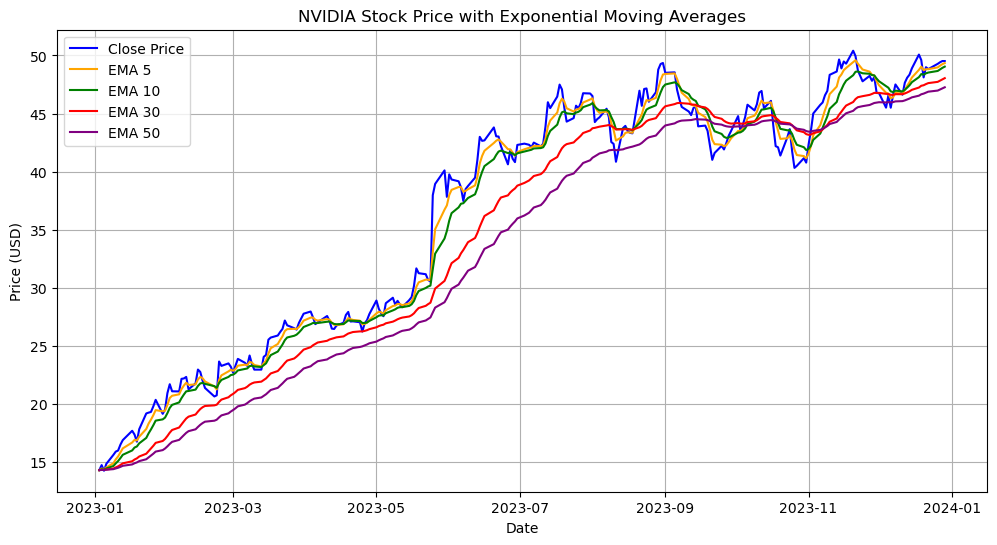

In [7]:
# Рассчитываем экспоненциальные скользящие средние
nvda['EMA_5'] = nvda['Close'].ewm(span=5, adjust=False).mean()
nvda['EMA_10'] = nvda['Close'].ewm(span=10, adjust=False).mean()
nvda['EMA_30'] = nvda['Close'].ewm(span=30, adjust=False).mean()
nvda['EMA_50'] = nvda['Close'].ewm(span=50, adjust=False).mean()

# Построение графика с экспоненциальными скользящими средними
plt.figure(figsize=(12, 6))
plt.plot(nvda['Close'], label='Close Price', color='blue')
plt.plot(nvda['EMA_5'], label='EMA 5', color='orange')
plt.plot(nvda['EMA_10'], label='EMA 10', color='green')
plt.plot(nvda['EMA_30'], label='EMA 30', color='red')
plt.plot(nvda['EMA_50'], label='EMA 50', color='purple')

plt.title('NVIDIA Stock Price with Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


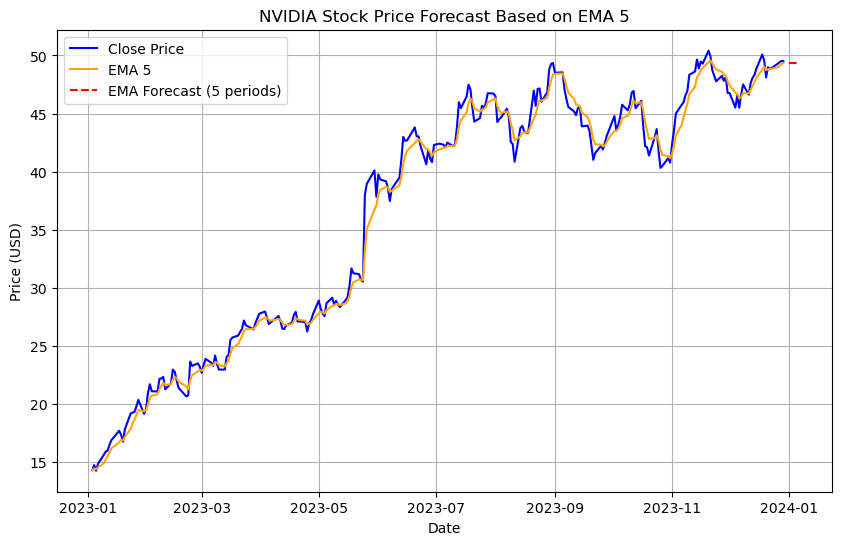

In [11]:
import pandas as pd

# Создаем прогноз на основе последнего значения EMA 5
last_ema = nvda['EMA_5'].iloc[-1]

forecast_periods = 5
forecast = [last_ema] * forecast_periods

# Создаем даты для прогноза
forecast_dates = pd.date_range(start=nvda.index[-1], periods=forecast_periods + 1, freq='B')[1:]

# Построение прогноза
plt.figure(figsize=(10, 6))
plt.plot(nvda['Close'], label='Close Price', color='blue')
plt.plot(nvda['EMA_5'], label='EMA 5', color='orange')
plt.plot(forecast_dates, forecast, label='EMA Forecast (5 periods)', linestyle='--', color='red')

plt.title('NVIDIA Stock Price Forecast Based on EMA 5')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


На графике показан прогноз цены акций NVIDIA на основе экспоненциального скользящего среднего (EMA) с окном 5 периодов:

Close Price:

Отображает исторические значения цены акций NVIDIA на протяжении всего рассматриваемого периода.
EMA 5:

EMA 5 реагирует на изменения цены более быстро, чем долгосрочные скользящие средние, так как придает больше веса последним значениям.
EMA Forecast на 5 периодов вперед:

EMA 5.
Линия показывает постоянный уровень, так как прогноз строится на предположении, что текущая тенденция сохраняется на короткий срок.
Это позволяет оценить краткосрочную динамику цены, но без учета резких изменений.

Что происходит на графике:
Исторические данные по цене акций демонстрируют движение и колебания цены.
EMA 5 плавно повторяет движения цены, сглаживая краткосрочные колебания.
Прогноз EMA (5 периодов) строится как горизонтальная линия на уровне последнего значения EMA 5.
Это указывает, что в отсутствие новых данных и на основе текущего тренда цена ожидается стабильной на протяжении 5 периодов.
    
Начальные выводы:
Прогноз на основе EMA 5 — достаточно простой метод, который хорошо работает при стабильном рынке.
Такой метод не учитывает потенциальные изменения в динамике и внешние факторы, влияющие на цену.
При резких колебаниях цена может сильно отклониться от прогноза.

# ВЫВОД

Проведенный анализ показал, что акции NVIDIA в 2023 году демонстрировали восходящий тренд, с некоторыми периодами коррекции.
Скользящие средние позволили сгладить колебания и выявить общие тренды. Простые SMA и экспоненциальные EMA показали свою эффективность для оценки динамики цен.
EMA оказались более чувствительными к изменениям и хорошо отражают локальные колебания.
Прогноз на основе EMA 5 предполагает стабилизацию цен на текущем уровне в краткосрочной перспективе.
Использование таких методов анализа полезно для выявления сигналов на покупку/продажу и понимания долгосрочных и краткосрочных трендов.





